# Plot a ROC curve showing performance of the filter SVM
Required input: `filterSvm_6mer_4gap.cvpred.txt` the file output from LS-GKM.
Output: `filterSvmRocCurve.svg` the ROC curve and assocaited AUC.

In [1]:
import os
import sys

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from IPython.display import display

from src.mpra_tools import loaders, plot_utils

svm_dir = os.path.join("ModelFitting", "FilterSVM")
figures_dir = "Figures"

plot_utils.set_manuscript_params()

/ref/bclab/software/ryan/.conda/envs/active-learning/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


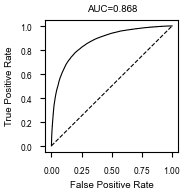

In [2]:
svm_cv_df = loaders.load_data(
    os.path.join(svm_dir, "filterSvm_6mer_4gap.cvpred.txt"),
    header=None,
    names=["coordinates", "score", "true_label", "fold"]
)
fpr, tpr, _ = roc_curve(svm_cv_df["true_label"], svm_cv_df["score"])
fig, ax = plt.subplots(figsize=plot_utils.get_figsize(0.25, 1))
ax.plot(fpr, tpr, color="k")
ax.plot([0, 1], [0, 1], color="k", linestyle="--")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title(f"AUC={auc(fpr, tpr):.3f}")
plot_utils.save_fig(fig, os.path.join(figures_dir, "filterSvmRocCurve"))